In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [6]:
import TOVsolver
import pandas as pd
n0 = 0.16 #MeV/fm^3

EOS_small = pd.read_table('data/EOSCEFTVE1.dat', header=None).to_numpy()

n = EOS_small[:,0] 
p = EOS_small[:,1] 
e = EOS_small[:,2] 

# making cs=1 extention
max_n = 10*n0
n_step = 1e-3
size = int((max_n-n[-1])/n_step)

# initialize array
EOS_ex = np.zeros((size, 3))
# set starting values at n = 2n0
EOS_ex[0,0] = n[-1]
EOS_ex[0,1] = p[-1]
EOS_ex[0,2] = e[-1]

for k in range(size-1):
    # n_i+1
    EOS_ex[k+1,0] = EOS_ex[k,0] + n_step
    # p_i+1
    EOS_ex[k+1, 1] = EOS_ex[k, 1] + n_step * 1 * ((EOS_ex[k, 1] + EOS_ex[k, 2]) / EOS_ex[k, 0])
    # e_i+1
    EOS_ex[k+1,2] = EOS_ex[k,2] + n_step*((EOS_ex[k,1]+EOS_ex[k,2])/EOS_ex[k,0])

# get relevant sizes
size_smol = EOS_small.shape[0] -1 # -1 becuase we don't want last duplicated entry
size_ex = EOS_ex.shape[0]

# initialize array
cs_eq1_EOS = np.zeros((size_smol+size_ex, EOS_small.shape[1]))

cs_eq1_EOS[:size_smol,:] = EOS_small[:size_smol,:]
cs_eq1_EOS[size_smol:,:] = EOS_ex[:,:]

cs_eq1_MRL = TOVsolver.solve(cs_eq1_EOS, size=80)

np.savetxt(os.getcwd() + "/data/cs_eq1EOS", cs_eq1_EOS)
np.savetxt(os.getcwd() + "/data/cs_eq1MRL", cs_eq1_MRL)

Text(0.5, 0, 'Pressure (MeV/fm3)')

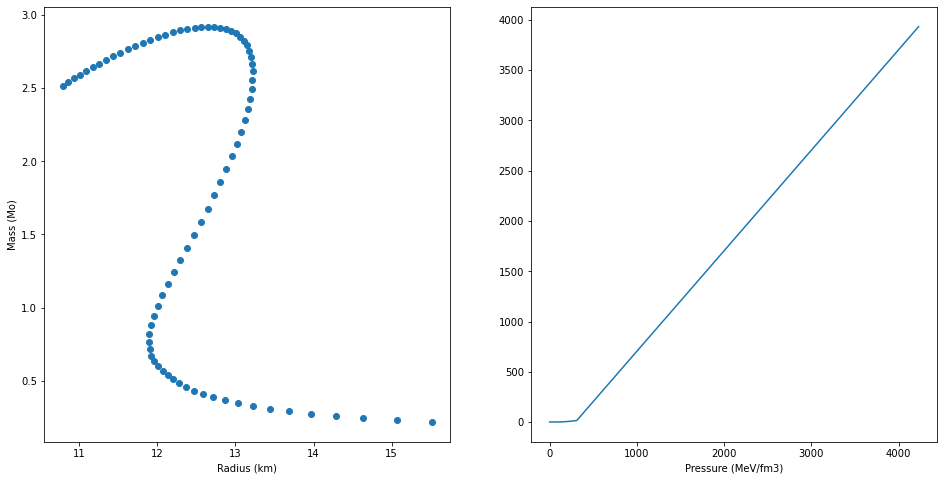

In [7]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
    
ax[0].plot(cs_eq1_MRL[:,1], cs_eq1_MRL[:,0], 'o')
ax[0].set_xlabel('Radius (km)')
ax[0].set_ylabel('Mass (Mo)')

ax[1].plot(cs_eq1_EOS[:,2], cs_eq1_EOS[:,1])
ax[1].set_xlabel('Energy Density (MeV/fm3)')
ax[1].set_xlabel('Pressure (MeV/fm3)')

In [8]:
keep = EOS_small[:,0] < 0.1601
EOS_start = EOS_small[keep,:]
n = EOS_start[:,0] 
p = EOS_start[:,1] 
e = EOS_start[:,2] 

# making cs=1 extention
max_n = 10*n0
n_step = 1e-3
size = int((max_n-n[-1])/n_step)

# initialize array
EOS_ex = np.zeros((size, 3))
# set starting values at n = n0
EOS_ex[0,0] = n[-1]
EOS_ex[0,1] = p[-1]
EOS_ex[0,2] = e[-1]

for k in range(size-1):
    # n_i+1
    EOS_ex[k+1,0] = EOS_ex[k,0] + n_step
    # p_i+1 (set c_s = 1)
    EOS_ex[k+1, 1] = EOS_ex[k, 1] + n_step * 1 * ((EOS_ex[k, 1] + EOS_ex[k, 2]) / EOS_ex[k, 0])
    # e_i+1
    EOS_ex[k+1,2] = EOS_ex[k,2] + n_step*((EOS_ex[k,1]+EOS_ex[k,2])/EOS_ex[k,0])

# get relevant sizes
size_smol = EOS_start.shape[0] -1 # -1 becuase we don't want last duplicated entry
size_ex = EOS_ex.shape[0]

# initialize array
cs_eq1_EOS = np.zeros((size_smol+size_ex, EOS_start.shape[1]))

cs_eq1_EOS[:size_smol,:] = EOS_start[:size_smol,:]
cs_eq1_EOS[size_smol:,:] = EOS_ex[:,:]

cs_eq1_MRL = TOVsolver.solve(cs_eq1_EOS, size=80)

np.savetxt(os.getcwd() + "/data/cs_eq1EOS_n0", cs_eq1_EOS)
np.savetxt(os.getcwd() + "/data/cs_eq1MRL_n0", cs_eq1_MRL)

Text(0.5, 0, 'Pressure (MeV/fm3)')

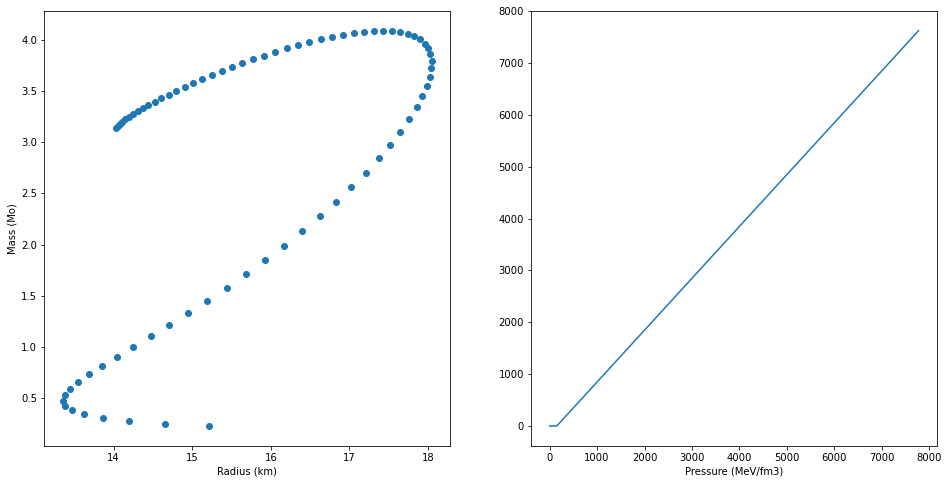

In [9]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
    
ax[0].plot(cs_eq1_MRL[:,1], cs_eq1_MRL[:,0], 'o')
ax[0].set_xlabel('Radius (km)')
ax[0].set_ylabel('Mass (Mo)')

ax[1].plot(cs_eq1_EOS[:,2], cs_eq1_EOS[:,1])
ax[1].set_xlabel('Energy Density (MeV/fm3)')
ax[1].set_xlabel('Pressure (MeV/fm3)')